Hello world for machine learning utilizing scikit-learn and tensorflow.
Write one program that can solve many problems, learn from examples and experiences.

Write code to tell the difference between an Apple and an Orange.
    What if photos are black and white... or no apple/orange in photo?
        We'd need a new program and/or tons of rules!
    What is better than this?
        Create a classifier: Function, takes data as input
        
Supervised learning: the act of creating classifiers
    ... think of a classifier as a box of rules.

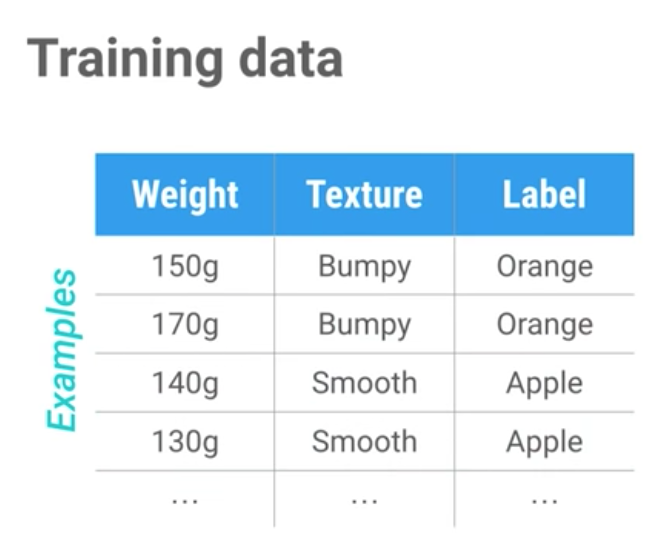

In [1]:
import sklearn
# First 2 columns
features = [[140, "smooth"], [130, "smooth"], [150, "bumpy"], [170, "bumpy"]]
# Last column
labels = ["apple", "apple", "orange", "orange",]

# ---------------------------------------------------------- #

# Change the variable types from string to int
import sklearn
# 0=bumpy  &  1=smooth
features = [[140, 1], [130, 1], [150, 0], [170, 0]]
# 0=apple  &  1=orange
labels = [0, 0, 1, 1]

In [8]:
# Train a classifier, in this case: a decision tree
# Now we can just change the training data, rather than rewriting the func

from sklearn import tree
# 0=bumpy  &  1=smooth
features = [[140, 1], [130, 1], [150, 0], [170, 0]]
# 0=apple  &  1=orange
labels = [0, 0, 1, 1]
clf = tree.DecisionTreeClassifier()
# fit = synonym for 'find patterns in data'
clf = clf.fit(features, labels)

print(clf.predict([[150, 0]]))
# Output will be 0=apple & 1=orange

[1]


In [12]:
# Utilizing iris - the dataset includes table from wikipedia and metadata

from sklearn.datasets import load_iris
iris = load_iris()

# Metadata tells us names of features and names of flower types
print(iris.feature_names)
print(iris.target_names)
print(iris.data[0])

print(iris.target[0])
# Label of 0 means it is a setosa

# To iterate over all 150 entries
for i in range(len(iris.target)):
    print("Example %d: label %s, features %s" % (i, iris.target[i], iris.data[i]))

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
[5.1 3.5 1.4 0.2]
0
Example 0: label 0, features [5.1 3.5 1.4 0.2]
Example 1: label 0, features [4.9 3.  1.4 0.2]
Example 2: label 0, features [4.7 3.2 1.3 0.2]
Example 3: label 0, features [4.6 3.1 1.5 0.2]
Example 4: label 0, features [5.  3.6 1.4 0.2]
Example 5: label 0, features [5.4 3.9 1.7 0.4]
Example 6: label 0, features [4.6 3.4 1.4 0.3]
Example 7: label 0, features [5.  3.4 1.5 0.2]
Example 8: label 0, features [4.4 2.9 1.4 0.2]
Example 9: label 0, features [4.9 3.1 1.5 0.1]
Example 10: label 0, features [5.4 3.7 1.5 0.2]
Example 11: label 0, features [4.8 3.4 1.6 0.2]
Example 12: label 0, features [4.8 3.  1.4 0.1]
Example 13: label 0, features [4.3 3.  1.1 0.1]
Example 14: label 0, features [5.8 4.  1.2 0.2]
Example 15: label 0, features [5.7 4.4 1.5 0.4]
Example 16: label 0, features [5.4 3.9 1.3 0.4]
Example 17: label 0, features [5.1 3.5 1.4 0.3]
Example

In [27]:
# Train a classifier - 1st split the data

import numpy as np
from sklearn.datasets import load_iris
from sklearn import tree

iris = load_iris()
test_idx = [0,50,100]

# Training data:
train_target = np.delete(iris.target, test_idx)
train_data = np.delete(iris.data, test_idx, axis=0)

# Testing data: (Just contains examples that were removed)
test_target = iris.target[test_idx]
test_data = iris.data[test_idx]

# Import classifier and train on data
clf = tree.DecisionTreeClassifier()
clf.fit(train_data, train_target)

print(test_target)
print(clf.predict(test_data))
# If predicted labels match testing data = that means all is correct

[0 1 2]
[0 1 2]


In [28]:
# Visualize the tree to see how classifier works.

from sklearn.externals.six import StringIO
import pydot
dot_data = StringIO()
tree.export_graphviz(clf,
                        out_file=dot_data,
                        feature_names=iris.feature_names,
                        class_names=iris.target_names,
                        filled=True, rounded=True,
                        impurity=False)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph[0].write_pdf("iris.pdf") 

# Use this format to run terminal commands in Jupyter Notebook
! open -a preview iris.pdf

Output from cell above:
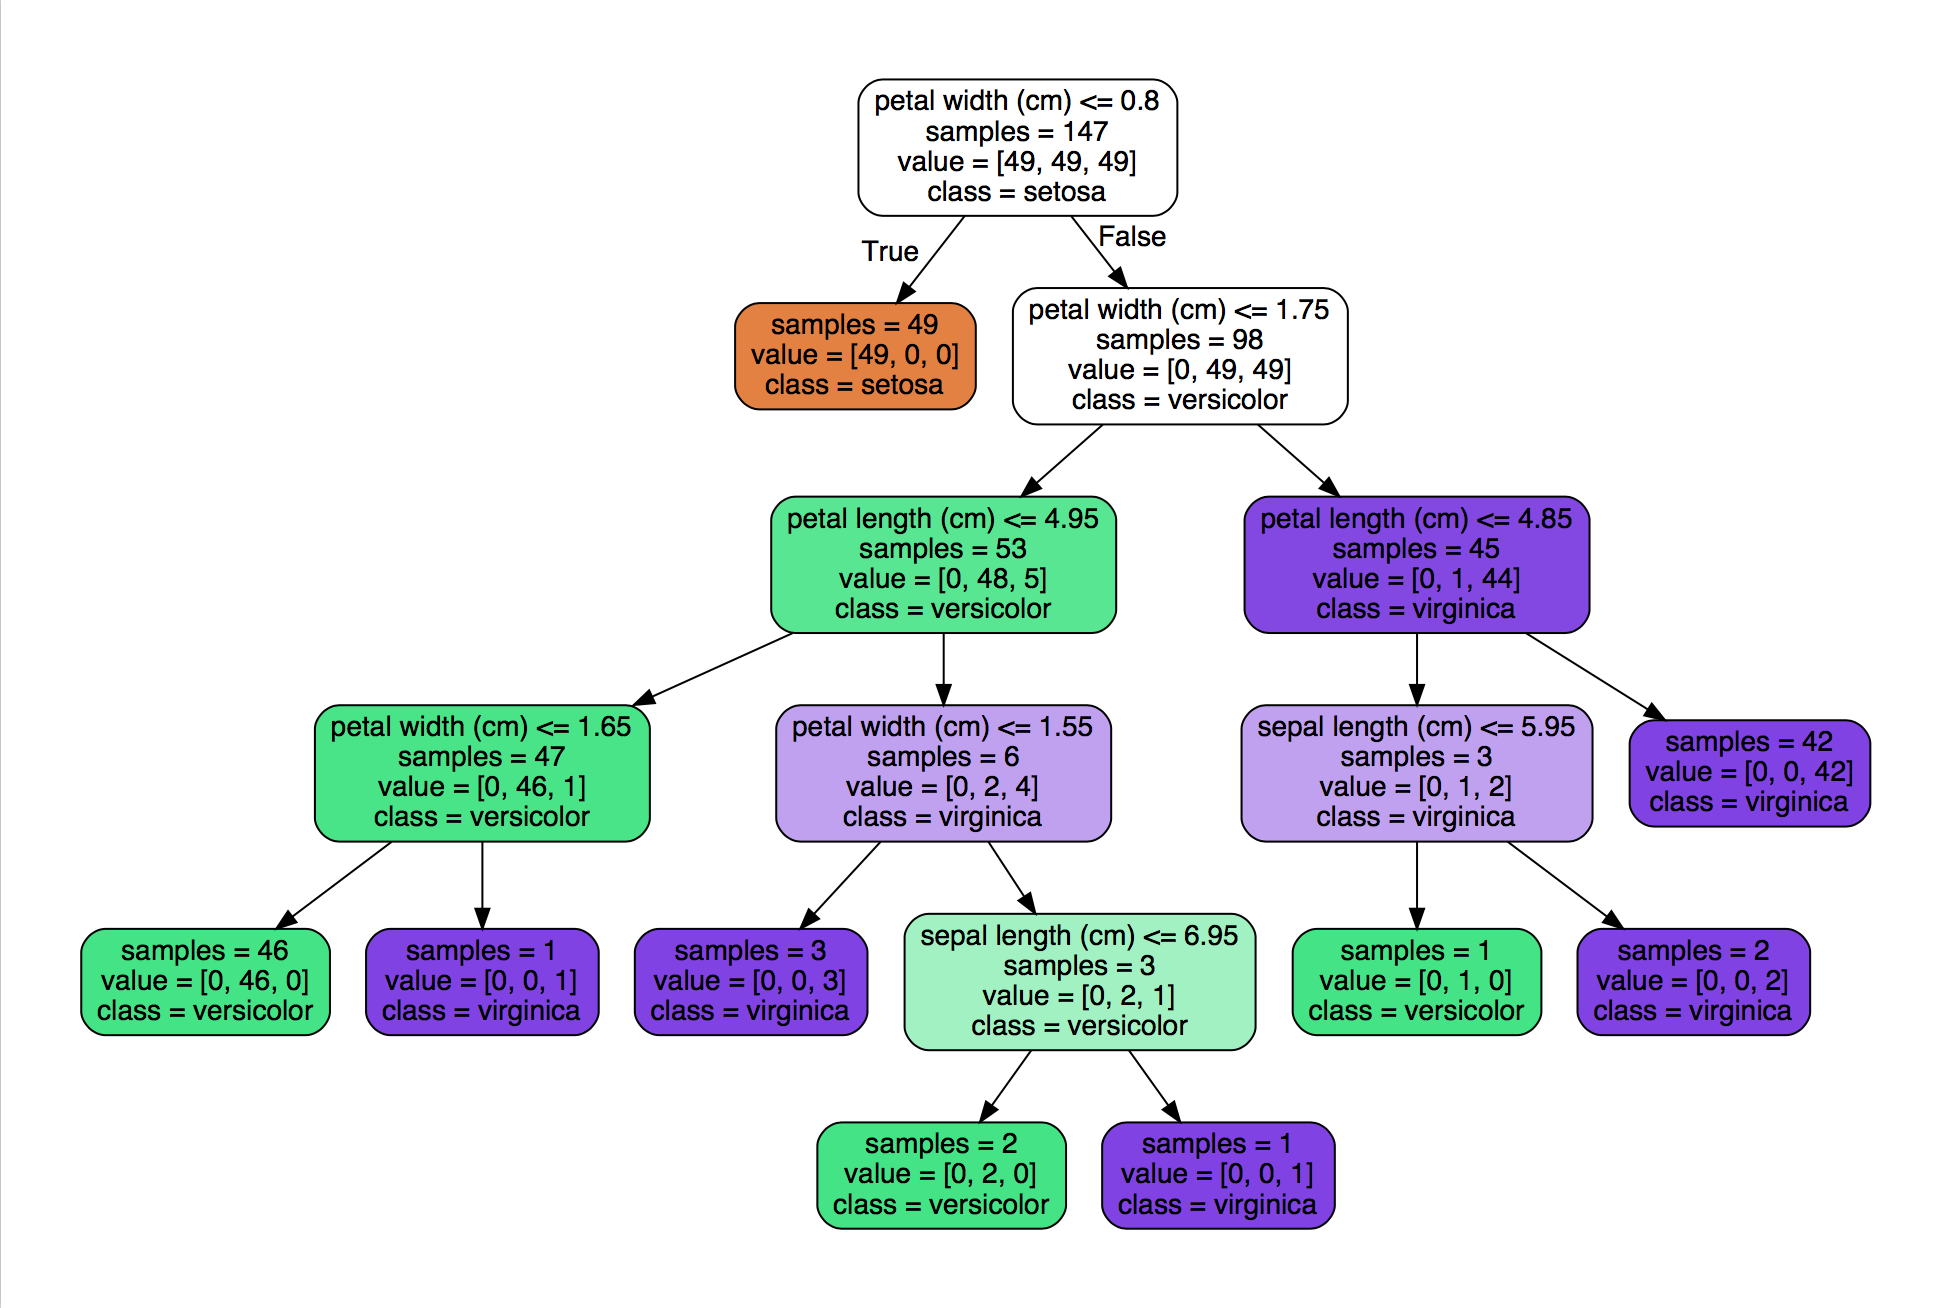

In [33]:
# Change 0-->1 to test second example.
print(test_data[0], test_target[0])
print(test_data[1], test_target[1])
print(test_data[2], test_target[2])

print(iris.feature_names, iris.target_names)

# Next up... how decision trees are automatically generated from examples.

[5.1 3.5 1.4 0.2] 0
[7.  3.2 4.7 1.4] 1
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] ['setosa' 'versicolor' 'virginica']


Classifiers are only as good as the features you provide!
Therefor, providing good features is critical.

IE: In a binary classifier, 0/1 should represent clearly defined differences.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

greyhounds = 500
labs = 500

# Average height of dog +/- 4 inches
grey_height = 28 + 4 * np.random.randn(greyhounds)
lab_height = 24 + 4 * np.random.randn(labs)

# greyHounds=red & labs=blue
plt.hist([grey_height, lab_height], stacked=True, color=['r','b'])
plt.show()

! python